In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import roc_auc_score
from rebalancedcv import RebalancedLeaveOneOut

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
# from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'white', 
            'figure.facecolor':'white', 
            'axes.edgecolor':'black', 
            'grid.color': 'black', 
            'axes.grid': False
            }, 
        
        style='ticks',
        font_scale=2
        )

In [2]:

def generate_dataset(n_features=5,
                     n_samples=25,
                     n_pos=0.5,
                     seed=42
                     ):
    np.random.seed(seed)
    X=np.random.rand(n_samples, n_features)
    y=np.random.rand(n_samples) < p
    return(X, y)



def generate_dataset(n_features=2,
                     n_samples=25,
#                      p=0.5,
                     n_pos = 3,
                     seed=42
                     ):
    np.random.seed(seed)
    X=np.random.rand(n_samples, n_features)
#     y=np.random.rand(n_samples) < p
    y = np.array( [True]*n_pos + [False]*(n_samples-n_pos) )
    
    return(X, y)

In [3]:
def test_loo_variations(X, 
                        y, 
                        seed=42):
    
    np.random.seed(seed)
    v1 = cross_val_predict(LogisticRegressionCV(cv=LeaveOneOut(),
                                                solver='newton-cg'
                                                ), 
                           X, 
                           y, 
                           cv=LeaveOneOut(), 
                           method='predict_proba'
                           )
    
    np.random.seed(seed)
    v2 = cross_val_predict(LogisticRegressionCV(cv=RebalancedLeaveOneOut(),
                                                solver='newton-cg', 
                                                ),
                           X, 
                           y, 
                           cv=RebalancedLeaveOneOut(), 
                           method='predict_proba'
                           )
    
    np.random.seed(seed)
    v3 = cross_val_predict(LogisticRegressionCV(#default cv is stratified 5-fold,
                                                solver='newton-cg', 
                                                ),
                           X, 
                           y, 
                           cv=RebalancedLeaveOneOut(), 
                           method='predict_proba'
                           )
    
    
    np.random.seed(seed)
    v4 = cross_val_predict(LogisticRegressionCV(#default cv is stratified 5-fold,
                                                    solver='newton-cg', 
                                                    ),
                               X, 
                               y, 
                               cv=LeaveOneOut(), 
                               method='predict_proba'
                               )
    
    
    np.random.seed(seed)
    v5 = cross_val_predict(LogisticRegression(#default cv is stratified 5-fold,
                                                solver='newton-cg', 
                                                ),
                           X, 
                           y, 
                           cv=RebalancedLeaveOneOut(), 
                           method='predict_proba'
                           )
    
    
    np.random.seed(seed)
    v6 = cross_val_predict(LogisticRegression(#default cv is stratified 5-fold,
                                                    solver='newton-cg', 
                                                    ),
                               X, 
                               y, 
                               cv=LeaveOneOut(), 
                               method='predict_proba'
                               )
    
    return(roc_auc_score(y, v1[:, 1]), 
           roc_auc_score(y, v2[:, 1]), 
           roc_auc_score(y, v3[:, 1]), 
           roc_auc_score(y, v4[:, 1]), 
           roc_auc_score(y, v5[:, 1]), 
           roc_auc_score(y, v6[:, 1]), 
           )

In [4]:
just_loocv_aurocs = []

for p in [10, 20, 25]:
    for seed in range(25):
        X,y=generate_dataset(n_samples=50,
                             n_pos=p,
                             seed=seed
                             )
        np.random.seed(seed)
        v6 = cross_val_predict(LogisticRegression(#default cv is stratified 5-fold,
                                                    solver='newton-cg', 
                                                    ),
                               X, 
                               y, 
                               cv=LeaveOneOut(), 
                               method='predict_proba'
                               )
        
        just_loocv_aurocs.append(roc_auc_score(y, v6[:, 1]))
        

In [5]:
%%time

all_ps = []
all_honest_loocv_aurocs=[]
all_nested_kfold_aurocs=[]
all_honest_rloocv_aurocs=[]
all_nested_kfold_loocv_aurocs=[]
just_rloocv_aurocs=[]
just_loocv_aurocs=[]
all_seeds=[]

for p in [10, 20, 25]:
    for seed in range(25):
        X,y=generate_dataset(n_samples=50,
                             n_pos=p,
                             seed=seed
                             )
        
        r1,r2,r3, r4, r5, r6 = test_loo_variations(X, y, seed=42+seed)
        
        all_honest_loocv_aurocs.append(r1)
        all_honest_rloocv_aurocs.append(r2)
        all_nested_kfold_aurocs.append(r3)
        all_nested_kfold_loocv_aurocs.append(r4)
        just_rloocv_aurocs.append(r5)
        just_loocv_aurocs.append(r6)
        all_ps.append(p)
        all_seeds.append(seed)
        
        print(p)
        print(all_honest_loocv_aurocs)
        print(all_honest_rloocv_aurocs)

10
[0.0]
[0.655]
10
[0.0, 0.0]
[0.655, 0.655]
10
[0.0, 0.0, 0.0]
[0.655, 0.655, 0.38250000000000006]
10
[0.0, 0.0, 0.0, 0.0]
[0.655, 0.655, 0.38250000000000006, 0.5675]
10
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.655, 0.655, 0.38250000000000006, 0.5675, 0.15499999999999997]
10
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.655, 0.655, 0.38250000000000006, 0.5675, 0.15499999999999997, 0.40249999999999997]
10
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.655, 0.655, 0.38250000000000006, 0.5675, 0.15499999999999997, 0.40249999999999997, 0.455]
10
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.655, 0.655, 0.38250000000000006, 0.5675, 0.15499999999999997, 0.40249999999999997, 0.455, 0.23500000000000004]
10
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.655, 0.655, 0.38250000000000006, 0.5675, 0.15499999999999997, 0.40249999999999997, 0.455, 0.23500000000000004, 0.4375]
10
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.655, 0.655, 0.38250000000000006, 0.5675, 0.15499999999999997, 0.40249999999999997, 0.455, 0.2350000

20
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8033333333333333, 0.0, 0.0, 0.0, 0.0, 0.25333333333333335]
[0.655, 0.655, 0.38250000000000006, 0.5675, 0.15499999999999997, 0.40249999999999997, 0.455, 0.23500000000000004, 0.4375, 0.44999999999999996, 0.41, 0.53, 0.195, 0.51, 0.5925, 0.5700000000000001, 0.635, 0.375, 0.4175, 0.565, 0.44499999999999995, 0.5750000000000001, 0.6174999999999999, 0.3175, 0.21750000000000003, 0.835, 0.5533333333333333, 0.5533333333333333, 0.39666666666666667, 0.28500000000000003, 0.49833333333333335]
20
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8033333333333333, 0.0, 0.0, 0.0, 0.0, 0.25333333333333335, 0.0]
[0.655, 0.655, 0.38250000000000006, 0.5675, 0.15499999999999997, 0.40249999999999997, 0.455, 0.23500000000000004, 0.4375, 0.44999999999999996, 0.41, 0.53, 0.195, 0.51, 0.5925, 0.570000000000

20
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8033333333333333, 0.0, 0.0, 0.0, 0.0, 0.25333333333333335, 0.0, 0.0, 0.0, 0.32999999999999996, 0.0, 0.0, 0.0, 0.15499999999999997, 0.5083333333333333, 0.0, 0.0, 0.0]
[0.655, 0.655, 0.38250000000000006, 0.5675, 0.15499999999999997, 0.40249999999999997, 0.455, 0.23500000000000004, 0.4375, 0.44999999999999996, 0.41, 0.53, 0.195, 0.51, 0.5925, 0.5700000000000001, 0.635, 0.375, 0.4175, 0.565, 0.44499999999999995, 0.5750000000000001, 0.6174999999999999, 0.3175, 0.21750000000000003, 0.835, 0.5533333333333333, 0.5533333333333333, 0.39666666666666667, 0.28500000000000003, 0.49833333333333335, 0.45, 0.33, 0.315, 0.5766666666666667, 0.32499999999999996, 0.3483333333333333, 0.08166666666666667, 0.52, 0.5566666666666666, 0.18666666666666665, 0.585, 0.5700000000000001]
20
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

25
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8033333333333333, 0.0, 0.0, 0.0, 0.0, 0.25333333333333335, 0.0, 0.0, 0.0, 0.32999999999999996, 0.0, 0.0, 0.0, 0.15499999999999997, 0.5083333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7552, 0.47040000000000004]
[0.655, 0.655, 0.38250000000000006, 0.5675, 0.15499999999999997, 0.40249999999999997, 0.455, 0.23500000000000004, 0.4375, 0.44999999999999996, 0.41, 0.53, 0.195, 0.51, 0.5925, 0.5700000000000001, 0.635, 0.375, 0.4175, 0.565, 0.44499999999999995, 0.5750000000000001, 0.6174999999999999, 0.3175, 0.21750000000000003, 0.835, 0.5533333333333333, 0.5533333333333333, 0.39666666666666667, 0.28500000000000003, 0.49833333333333335, 0.45, 0.33, 0.315, 0.5766666666666667, 0.32499999999999996, 0.3483333333333333, 0.08166666666666667, 0.52, 0.5566666666666666, 0.18666666666666665, 0.585, 0.5700000000000001, 0.4883333333333333, 0.5383333333333333,

25
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8033333333333333, 0.0, 0.0, 0.0, 0.0, 0.25333333333333335, 0.0, 0.0, 0.0, 0.32999999999999996, 0.0, 0.0, 0.0, 0.15499999999999997, 0.5083333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7552, 0.47040000000000004, 0.3824, 0.496, 0.0, 0.5344, 0.46559999999999996, 0.0, 0.25439999999999996, 0.6192]
[0.655, 0.655, 0.38250000000000006, 0.5675, 0.15499999999999997, 0.40249999999999997, 0.455, 0.23500000000000004, 0.4375, 0.44999999999999996, 0.41, 0.53, 0.195, 0.51, 0.5925, 0.5700000000000001, 0.635, 0.375, 0.4175, 0.565, 0.44499999999999995, 0.5750000000000001, 0.6174999999999999, 0.3175, 0.21750000000000003, 0.835, 0.5533333333333333, 0.5533333333333333, 0.39666666666666667, 0.28500000000000003, 0.49833333333333335, 0.45, 0.33, 0.315, 0.5766666666666667, 0.32499999999999996, 0.3483333333333333, 0.08166666666666667, 0.52, 0.5566666666666666, 0.18

25
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8033333333333333, 0.0, 0.0, 0.0, 0.0, 0.25333333333333335, 0.0, 0.0, 0.0, 0.32999999999999996, 0.0, 0.0, 0.0, 0.15499999999999997, 0.5083333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7552, 0.47040000000000004, 0.3824, 0.496, 0.0, 0.5344, 0.46559999999999996, 0.0, 0.25439999999999996, 0.6192, 0.3808, 0.38560000000000005, 0.0, 0.44480000000000003, 0.5136000000000001, 0.46559999999999996, 0.5728000000000001]
[0.655, 0.655, 0.38250000000000006, 0.5675, 0.15499999999999997, 0.40249999999999997, 0.455, 0.23500000000000004, 0.4375, 0.44999999999999996, 0.41, 0.53, 0.195, 0.51, 0.5925, 0.5700000000000001, 0.635, 0.375, 0.4175, 0.565, 0.44499999999999995, 0.5750000000000001, 0.6174999999999999, 0.3175, 0.21750000000000003, 0.835, 0.5533333333333333, 0.5533333333333333, 0.39666666666666667, 0.28500000000000003, 0.49833333333333335, 0.45, 0.33, 0.3

25
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8033333333333333, 0.0, 0.0, 0.0, 0.0, 0.25333333333333335, 0.0, 0.0, 0.0, 0.32999999999999996, 0.0, 0.0, 0.0, 0.15499999999999997, 0.5083333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7552, 0.47040000000000004, 0.3824, 0.496, 0.0, 0.5344, 0.46559999999999996, 0.0, 0.25439999999999996, 0.6192, 0.3808, 0.38560000000000005, 0.0, 0.44480000000000003, 0.5136000000000001, 0.46559999999999996, 0.5728000000000001, 0.3184, 0.0, 0.5488, 0.38079999999999997, 0.488, 0.5392]
[0.655, 0.655, 0.38250000000000006, 0.5675, 0.15499999999999997, 0.40249999999999997, 0.455, 0.23500000000000004, 0.4375, 0.44999999999999996, 0.41, 0.53, 0.195, 0.51, 0.5925, 0.5700000000000001, 0.635, 0.375, 0.4175, 0.565, 0.44499999999999995, 0.5750000000000001, 0.6174999999999999, 0.3175, 0.21750000000000003, 0.835, 0.5533333333333333, 0.5533333333333333, 0.39666666666666667, 

/Users/george/opt/anaconda3/envs/pl2/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/george/opt/anaconda3/envs/pl2/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 76.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/george/opt/anaconda3/envs/pl2/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/george/opt/anaconda3/envs/pl2/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/george/op

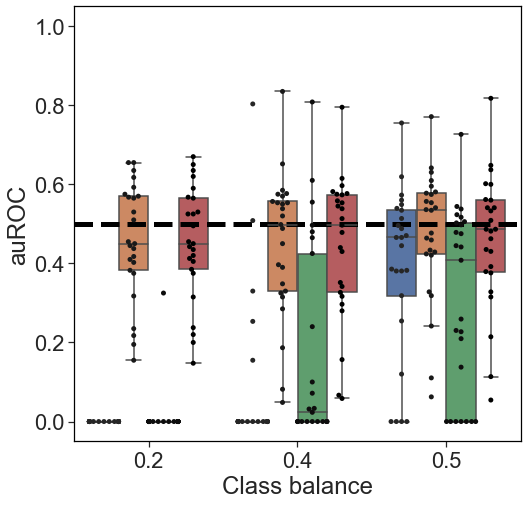

In [6]:
plot_data_2 = \
    pd.DataFrame({'auROC':
                              all_nested_kfold_loocv_aurocs + 
                              all_honest_loocv_aurocs +\
                              all_nested_kfold_aurocs + \
                              all_honest_rloocv_aurocs, 
                  'Method':
                              ['Nested Kfold LOOCV']*len(all_nested_kfold_loocv_aurocs) + \
                              ['Honest LOOCV']*len(all_honest_loocv_aurocs) + \
                              ['Nested Kfold RLOOCV']*len(all_nested_kfold_aurocs) + \
                              ['Nested RLOOCV']*len(all_honest_rloocv_aurocs),
                  'Class balance':[a/50 for a in all_ps]*4
                  })

plt.figure(figsize=(8,8))
ax=sns.boxplot(x='Class balance', 
            y='auROC', 
            hue='Method', 
               hue_order = [ 'Honest LOOCV', 'Nested RLOOCV', 
                             'Nested Kfold LOOCV', 'Nested Kfold RLOOCV' ],
            data=plot_data_2, 
            fliersize=0
            )
handles, labels = ax.get_legend_handles_labels()

sns.swarmplot(x='Class balance', 
            y='auROC', 
            hue='Method', 
            data=plot_data_2, 
                 hue_order = [ 'Honest LOOCV', 'Nested RLOOCV', 
                             'Nested Kfold LOOCV', 'Nested Kfold RLOOCV' ],
            s=5, 
              color='black', 
              dodge=True,
            ax=ax
            )

plt.plot([-.5, 8.5], [.5, .5], '--',
             linewidth = 5, 
             color='black'
             )
plt.legend().remove()

# Put a legend to the right of the current axis
# ax.legend(handles[:4], labels[:4], loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(-0.05, 1.05)

# plt.title('Honest LOOCV can suffer from distributional bias in in silico simulations')
plt.savefig('../plots-latest/HLOOCV-simulations.pdf', 
            format='pdf', 
            bbox_inches='tight', 
            dpi=900
            )

plt.show()

In [7]:
from scipy.stats import ttest_1samp

In [8]:
plot_data_2.groupby(['Method','Class balance'])\
            ['auROC'].apply(lambda x: ttest_1samp(x, .5)[1])\
            .to_frame()

auROC
Method              Class balance              
Honest LOOCV        0.2            0.000000e+00
                    0.4            1.551934e-10
                    0.5            1.416575e-02
Nested Kfold LOOCV  0.2            8.295000e-23
                    0.4            1.098825e-06
                    0.5            3.672128e-04
Nested Kfold RLOOCV 0.2            1.027271e-01
                    0.4            1.214619e-01
                    0.5            2.482215e-01
Nested RLOOCV       0.2            1.363408e-01
                    0.4            1.624085e-01
                    0.5            4.488008e-01